### Images we will use (all from `skimage.data`)

* **camera** – classic grayscale scene (person + buildings) → edges, HOG.
* **checkerboard** – strong corners → Harris/FAST.
* **coins** – clean edges, varying contrast → Sobel/Canny, thresholding.
* **page** / **text** – thin strokes → Canny sensitivity, corner density.
* **brick**, **gravel**, **grass** – textures → HOG/LBP feel.
* **astronaut** / **rocket** / **chelsea** – natural images → gradients, HOG sanity-check.

### **How to use them**

* **Sobel / Scharr** → see edges on “Cameraman” or “House.”
* **Canny** → same images, but you’ll notice much cleaner, thinned edge maps.
* **Harris / FAST** → try “Chessboard” or “House”; you’ll see corners pop.
* **HOG** → “Pedestrian datasets” (INRIA person dataset) shows why HOG was famous.
* **SIFT / SURF / ORB** → use “Lena” or “Barbara,” then rotate/scale and check if keypoints still match.

In [1]:
import cv2 # OpenCV for image processing
import numpy as np # NumPy for numerical operations
from matplotlib import pyplot as plt # Matplotlib for plotting
from skimage import data    # scikit-image for sample images

Matplotlib is building the font cache; this may take a moment.


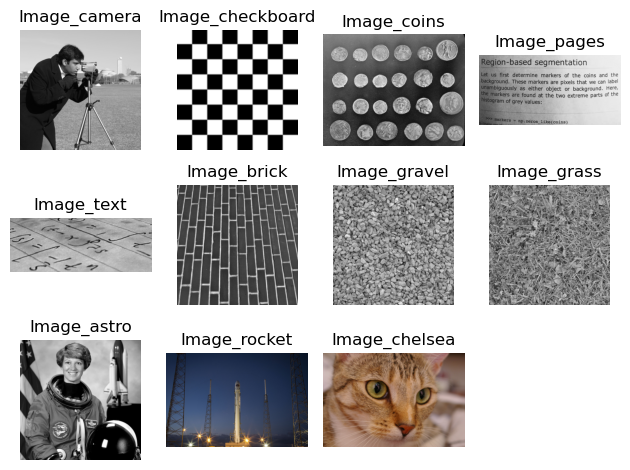

In [2]:
# put all in for loop   
images = [data.camera(),        # classic grayscale scene (person + buildings)
          data.checkerboard(),  # strong corners
          data.coins(),         # clean edges, varying contrast
          data.page(),          # thin strokes
          data.text(),          # thin strokes
          data.brick(),         # textures
          data.gravel(),        # textures
          data.grass(),         # textures
          cv2.cvtColor(data.astronaut(), cv2.COLOR_BGR2GRAY),  # natural image
          data.rocket(),       # natural image
          data.chelsea()]      # natural image

titles = ['Image_camera',               
          'Image_checkboard', 
          'Image_coins', 
          'Image_pages', 
          'Image_text', 
          'Image_brick', 
          'Image_gravel', 
          'Image_grass', 
          'Image_astro', 
          'Image_rocket', 
          'Image_chelsea']


# create dictionary to store above images with their names as keys
image_dict = {titles[i]: images[i] for i in range(len(images))}

for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off') # Hide axisss
plt.tight_layout()
plt.show()

### Gradient ( 1st deriviative) filters
* Sobel
* Scharr
* Laplacian
* Canny
* Morphological Gradient (morphologyEx → MORPH\_GRADIENT)
* Laplacian of Gaussian (Gaussian blur + Laplacian)
* Gabor filter (getGaborKernel + filter2D)
* Structured Edge Detection (ximgproc)


neat progression — to see why each filter came after the previous one:

⸻
| Filter         | Kernel size | Derivative style             | Smoothing style           | Strengths                                 | Weaknesses                                   |
|----------------|-------------|------------------------------|---------------------------|-------------------------------------------|----------------------------------------------|
| Roberts Cross  | 2×2         | Diagonal difference (Gx, Gy) | None (no smoothing)       | Tiny, cheap, captures diagonal edges well | Extremely noise-sensitive, jagged edges      |
| Prewitt        | 3×3         | Central difference [-1,0,+1] | Uniform [1,1,1]           | Simple, easy to compute                   | Weak diagonals, poor noise suppression       |
| Sobel          | 3×3 (5×5, 7×7) | Central difference [-1,0,+1] | Gaussian-like [1,2,1]     | Better noise suppression, smoother edges  | Still anisotropic (bias to H/V edges)        |
| Scharr         | 3×3         | Central difference [-1,0,+1] | Tuned weights [3,10,3]    | Almost isotropic, better orientation accuracy | Limited to 3×3, slightly heavier than Sobel |
⸻

### key points
	•	Roberts: “The earliest, smallest edge detector — very noisy.”
	•	Prewitt: “Sobel’s predecessor — uniform smoothing, cheaper but weaker.”
	•	Sobel: “Most common — Pascal smoothing, robust enough.”
	•	Scharr: “Sobel refined — tuned for isotropy, better for orientation-sensitive tasks.”

⸻

Want me to add Laplacian / LoG / Canny into this same table so you have the second-order and multi-stage detectors lined up too?

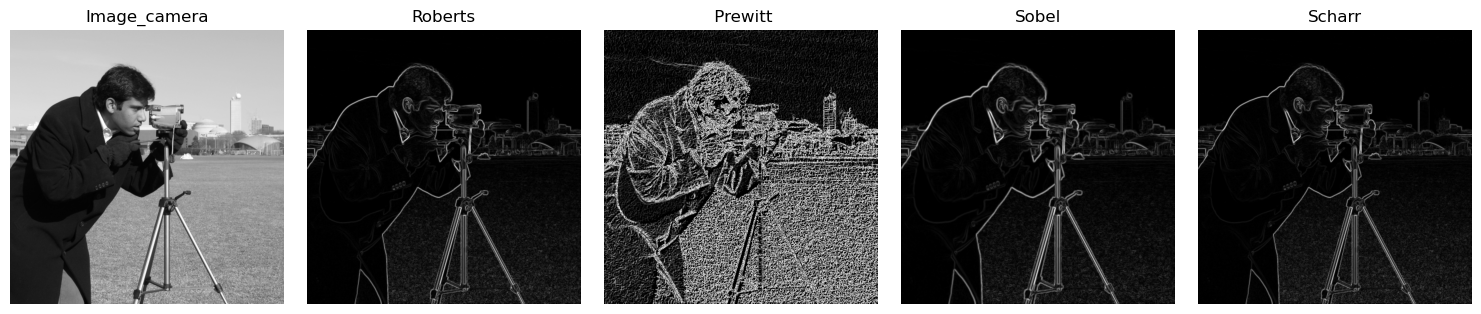

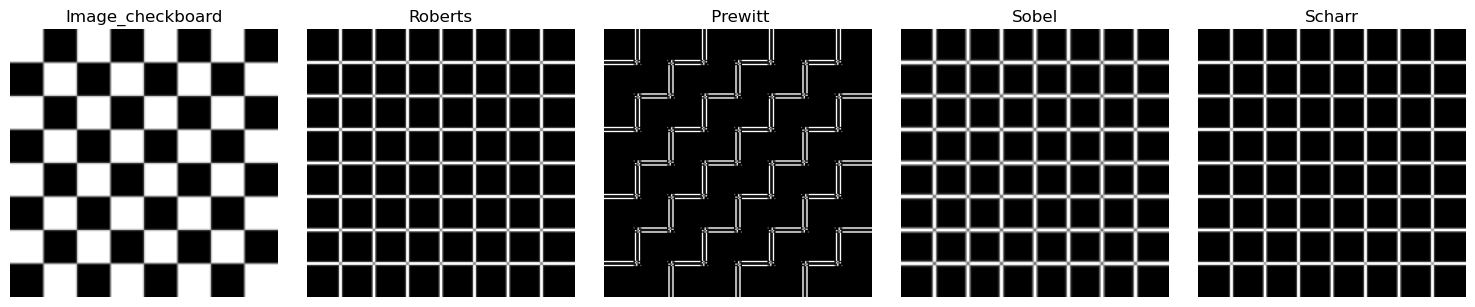

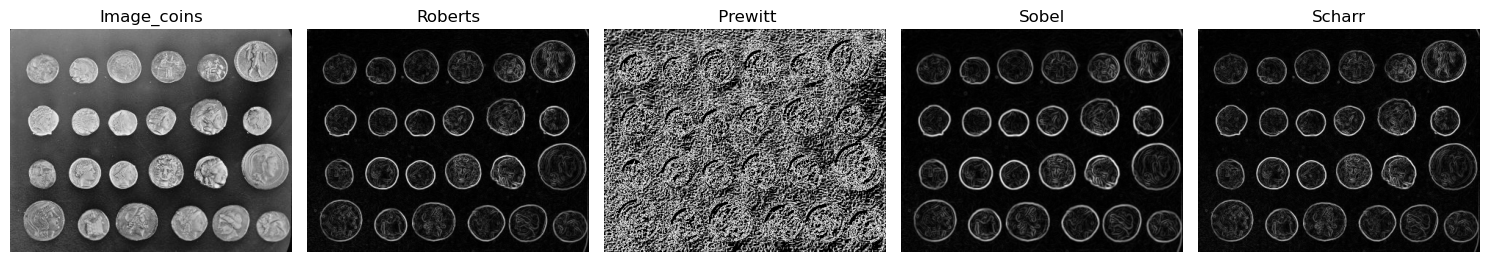

In [ ]:
# Improved: Use image_dict, user can select images, and avoid subplot index errors
# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_coins', 'Image_brick']  # <-- change as needed

for name in selected_images:
    image = image_dict[name]

    # Roberts (approximate with Sobel 3x3)
    roberts_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    roberts_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    roberts = np.sqrt(roberts_x**2 + roberts_y**2)

    # Prewitt
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewitt_x = cv2.filter2D(image, -1, kernelx)
    prewitt_y = cv2.filter2D(image, -1, kernely)
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Sobel
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    # Scharr
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr = np.sqrt(scharr_x**2 + scharr_y**2)

    plt.figure(figsize=(18, 4))
    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(roberts, cmap='gray')
    plt.title('Roberts')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(scharr, cmap='gray')
    plt.title('Scharr')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

| Filter | Camera | Checkerboard | Coins | Takeaways |
| :--- | :--- | :--- | :--- | :--- |
| **Roberts** | picks edges but looks thin, noisy, diagonal emphasis. | detects borders but with very fine, thin lines. | outlines coins well, but very thin and weak detail inside. | smallest, but too noise sensitive. |
| **Prewitt** | stronger response everywhere, but also grainy → lots of noise. | staircase-like artifacts — you can see jagged diagonal patterns. | strong but very noisy texture inside coins. | works, but artifacts and noise. |
| **Sobel** | edges are cleaner, background noise suppressed. | clean, uniform grid edges. | clear coin boundaries, decent interior detail. | robust default, balances derivative and smoothing. |
| **Scharr** | very close to Sobel, but edges (like tripod legs) look slightly sharper, diagonals balanced. | also clean, with more uniform brightness across edge directions (isotropy effect). | boundaries similar to Sobel, but gradients on coin faces look more even, diagonals balanced. | best isotropy, sharper diagonals, often chosen when gradient direction accuracy matters (HOG, optical flow). |

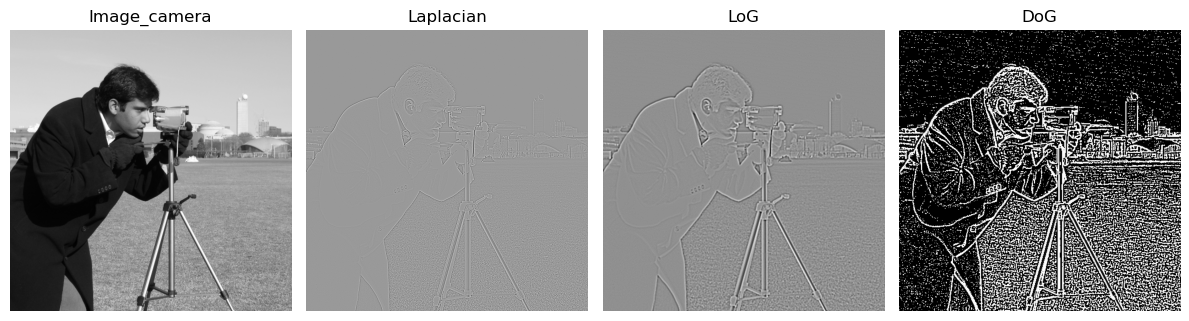

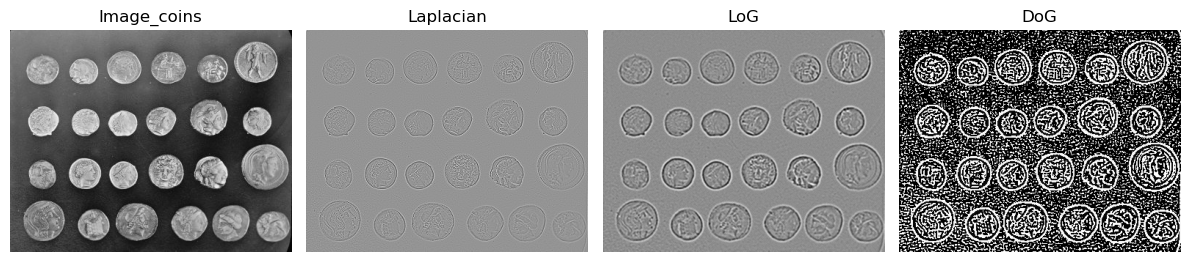

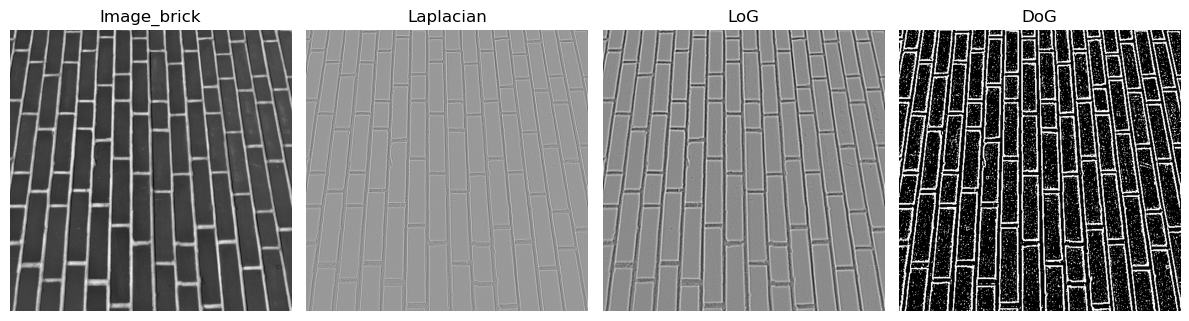

In [7]:
# Improved: Use image_dict, user can select images, and avoid subplot index errors
# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_coins', 'Image_brick']  # <-- change as needed

for name in selected_images:
    image = image_dict[name]

    # Laplacian
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # LoG
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)

    # DoG
    gaussian1 = cv2.GaussianBlur(image, (5, 5), 1)
    gaussian2 = cv2.GaussianBlur(image, (5, 5), 2)
    dog = gaussian1 - gaussian2

    plt.figure(figsize=(12, 9))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(log, cmap='gray')
    plt.title('LoG')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(dog, cmap='gray')
    plt.title('DoG')
    plt.axis('off')

    plt.tight_layout()
    plt.show()